**CNN-Convolutional Neural Network On Skin Diseases Classification**

Image Classification
*   It is a MultiClass Classification
*   Checking or Predicting the image on particular diseases

Step1: Now Reading the data from the folder to our notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np 
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
for dirname, _, filenames in os.walk('/content/drive/My Drive/CV_Hackathon/'):
    for filename in filenames:
       print(os.path.join(dirname, filename))

/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/Acral lentiginous melanoma images.jpg
/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/Acral lentiginous melanoma_ Symptoms.jpg
/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/Acral lentiginous melanoma in situ.jpg
/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/Acral lentiginous melanoma in situ (1).jpg
/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/acral lentiginous melanoma ALM.jpg.crdownload.jpg
/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/Acral lentiginous melanoma on the.jpg
/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/Acral Lentiginous Melanoma - AIM at (1).jpg
/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/Acral lentiginous melanoma_ Symptoms (1).jpg
/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)/Acral Lentiginous Melanoma_ A Case.jpg
/content/dr

In [4]:
modifiedList=[]
for dirname, _, filenames in os.walk('/content/drive/My Drive/CV_Hackathon/'):
  for e in filenames:
    modifiedList.append(e)
modifiedList

['Acral lentiginous melanoma images.jpg',
 'Acral lentiginous melanoma_ Symptoms.jpg',
 'Acral lentiginous melanoma in situ.jpg',
 'Acral lentiginous melanoma in situ (1).jpg',
 'acral lentiginous melanoma ALM.jpg.crdownload.jpg',
 'Acral lentiginous melanoma on the.jpg',
 'Acral Lentiginous Melanoma - AIM at (1).jpg',
 'Acral lentiginous melanoma_ Symptoms (1).jpg',
 'Acral Lentiginous Melanoma_ A Case.jpg',
 'Acral Lentiginous Melanoma - AIM at.jpg',
 'Dermoscopic features of acral.jpg',
 'Melanoma_ Acral Lentiginous - American.jpg',
 'Melanoma - Pathology - Orthobullets.jpg',
 'Acral Lentiginous Melanoma_ Symptoms (2).jpg',
 'Acral Lentiginous Melanoma _ SpringerLink (1).jpg',
 'Acral lentiginous melanoma images (1).jpg',
 'Acral lentiginous melanoma in the.jpg',
 'Acral Lentiginous Melanoma_ What Sets.jpg',
 'like acral lentiginous melanoma (ALM.jpg',
 'Acral lentiginous melanoma survival.jpg',
 'Acral lentiginous melanoma - The Lancet.jpg',
 'Acral Lentiginous Melanoma (2).jpg',
 

In [5]:
len(modifiedList)

117

Showing images from Phytophotodermatitis  and Acral lentiginous melanoma

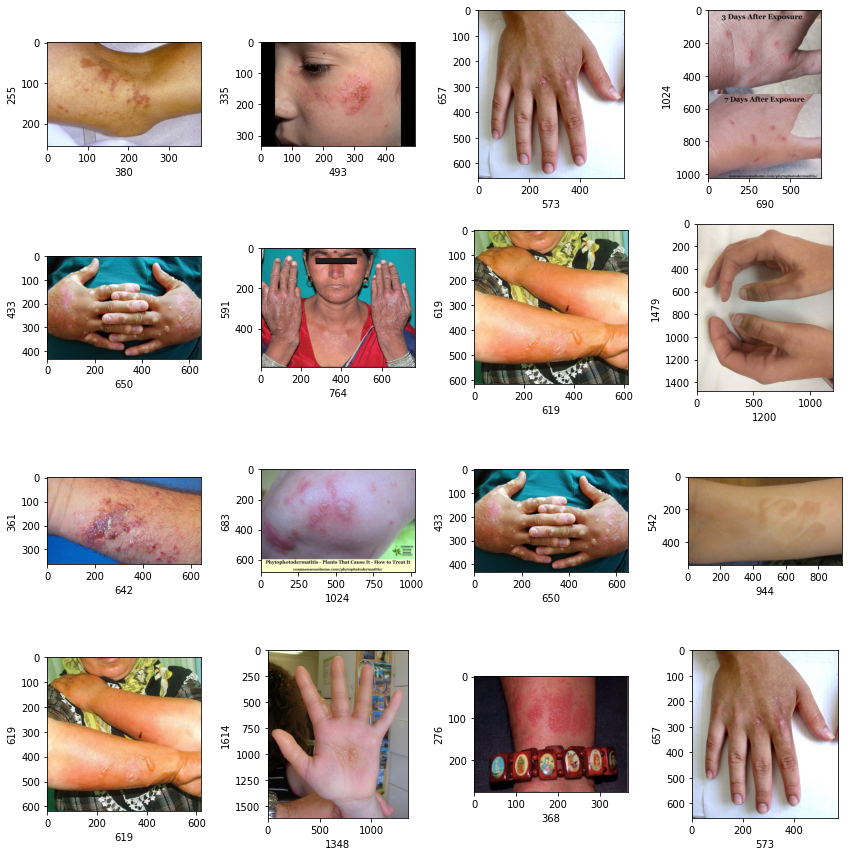

In [6]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/CV_Hackathon/Phytophotodermatitis (PPD)"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

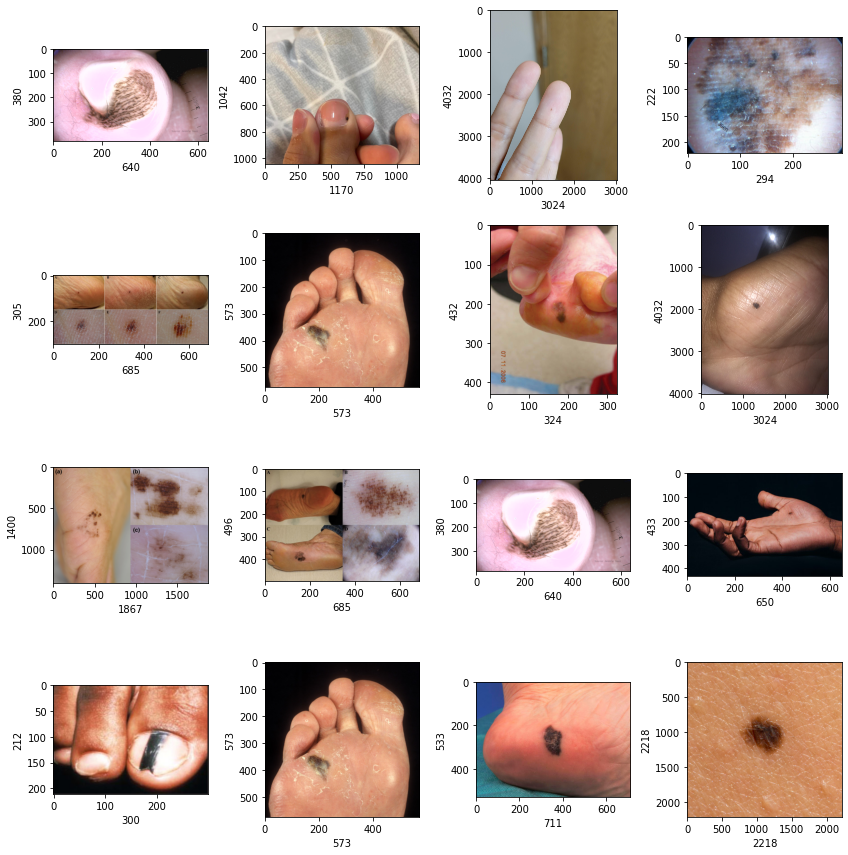

In [7]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/CV_Hackathon/Acrolentiginous Melanoma (ALM)"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [8]:
image_list=[]
for dirname, _, filenames in os.walk('/content/drive/My Drive/CV_Hackathon/'):
  for image_name in filenames:
    data_path = os.path.join(dirname, image_name)
    img=cv2.imread(data_path)
    print(img)
    try:
      img = cv2.resize(img, (180, 180), interpolation=cv2.INTER_AREA)
    except:
      break
    image_list.append(img)
  

Streaming output truncated to the last 5000 lines.
  [ 63  70 103]]]
[[[213 207 200]
  [213 207 200]
  [213 207 200]
  ...
  [237 230 227]
  [237 230 227]
  [237 230 227]]

 [[213 207 200]
  [213 207 200]
  [213 207 200]
  ...
  [237 230 227]
  [237 230 227]
  [237 230 227]]

 [[213 207 200]
  [213 207 200]
  [213 207 200]
  ...
  [237 230 227]
  [237 230 227]
  [237 230 227]]

 ...

 [[135 137 145]
  [131 133 141]
  [126 128 136]
  ...
  [240 235 236]
  [240 235 236]
  [240 235 236]]

 [[136 138 146]
  [131 133 141]
  [127 129 137]
  ...
  [241 236 237]
  [241 236 237]
  [241 236 237]]

 [[136 138 146]
  [132 134 142]
  [128 130 138]
  ...
  [242 237 238]
  [242 237 238]
  [242 237 238]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 

In [28]:
type(image_list)

list

In [9]:
import numpy as np

my_array = np.array(image_list)
# printing my_array
print(my_array)
# printing the type of my_array
print(type(my_array))

[[[[  0   0   0]
   [  0   0   1]
   [  0   0   1]
   ...
   [  0   2  11]
   [  3   0   1]
   [  3   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   1   0]
   ...
   [  4  16  30]
   [  1   3   7]
   [  2   0   0]]

  [[  0   0   1]
   [  0   0   0]
   [  1   2   0]
   ...
   [ 14  35  56]
   [  2  10  21]
   [  1   0   4]]

  ...

  [[ 65  92 122]
   [ 67  96 126]
   [ 70  96 126]
   ...
   [ 94 118 146]
   [100 125 151]
   [108 132 157]]

  [[ 65  91 121]
   [ 66  95 125]
   [ 70  96 126]
   ...
   [ 93 118 146]
   [ 98 122 150]
   [102 125 153]]

  [[ 64  91 121]
   [ 64  93 123]
   [ 69  95 125]
   ...
   [ 94 120 149]
   [ 96 120 150]
   [ 95 119 148]]]


 [[[ 90 104 153]
   [ 90 104 153]
   [ 93 107 156]
   ...
   [122 134 170]
   [131 142 180]
   [131 142 181]]

  [[ 91 105 154]
   [ 93 107 156]
   [ 95 109 158]
   ...
   [129 141 177]
   [132 143 180]
   [142 153 190]]

  [[ 96 111 157]
   [ 98 113 159]
   [ 96 110 157]
   ...
   [122 134 170]
   [127 139 174]
   [130 142

In [36]:
A=my_array[55]

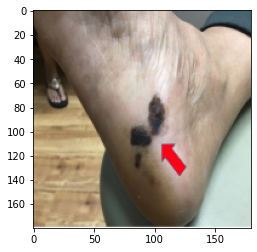

In [37]:
# plt.imshow(image_list[55])
plt.imshow(A[:,:,::-1])

In [10]:
my_array=my_array/255.0

In [53]:
datagen = ImageDataGenerator(rescale = 1./255)
dataset = datagen.flow_from_directory(path,
                                      target_size = IMAGE_SIZE,
                                      batch_size = 32,
                                      class_mode = 'sparse')

NameError: ignored

In [16]:
batch_size = 32
img_height = 180
img_width = 180

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/My Drive/CV_Hackathon",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 117 files belonging to 2 classes.
Using 94 files for training.


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/My Drive/CV_Hackathon",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 117 files belonging to 2 classes.
Using 23 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)

['Acrolentiginous Melanoma (ALM)', 'Phytophotodermatitis (PPD)']


In [39]:
print((train_ds))

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
label_list=['Acrolentiginous Melanoma (ALM)', 'Phytophotodermatitis (PPD)']

In [16]:
label_list = np.array(label_list)
label_list.shape

(2,)

In [56]:
my_array.shape

(115, 180, 180, 3)

In [20]:
from sklearn.model_selection import train_test_split

In [18]:
y=np.random.randint(0,2,115)
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(my_array,y,test_size=0.2, random_state = 10,shuffle=True, stratify=None)

In [25]:
x_train.shape,y_train.shape


((92, 180, 180, 3), (92,))

In [27]:
x_test.shape,y_test.shape

((23, 180, 180, 3), (23,))

Step 3 Model Building

In [29]:
from tensorflow.keras.models import Sequential

In [38]:
model = Sequential()
#adding the first Convolution layer
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(180,180,3), activation="relu"))
#adding Max pooling layer
model.add(MaxPool2D(pool_size=(3, 3)))
#adding another Convolution layer
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
#adding Max pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
#adding dense layer
model.add(Dense(8, activation="relu"))
#adding output layer
model.add(Dense(3, activation="softmax"))


In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [40]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
3/3 [==============================] - 3s 675ms/step - loss: 1.5913 - accuracy: 0.4674
Epoch 2/10
3/3 [==============================] - 2s 660ms/step - loss: 0.7619 - accuracy: 0.5870
Epoch 3/10
3/3 [==============================] - 2s 655ms/step - loss: 0.7679 - accuracy: 0.4783
Epoch 4/10
3/3 [==============================] - 2s 665ms/step - loss: 0.6712 - accuracy: 0.6196
Epoch 5/10
3/3 [==============================] - 2s 671ms/step - loss: 0.6471 - accuracy: 0.6957
Epoch 6/10
3/3 [==============================] - 2s 659ms/step - loss: 0.5824 - accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 2s 663ms/step - loss: 0.6811 - accuracy: 0.5870
Epoch 8/10
3/3 [==============================] - 2s 657ms/step - loss: 0.5646 - accuracy: 0.7935
Epoch 9/10
3/3 [==============================] - 2s 657ms/step - loss: 0.8309 - accuracy: 0.6304
Epoch 10/10
3/3 [==============================] - 2s 666ms/step - loss: 0.5942 - accuracy: 0.6848


In [43]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 512ms/step - loss: 0.7165 - accuracy: 0.6522


[0.7164688110351562, 0.6521739363670349]

In [44]:
pred=model.predict(x_test)
#printing the first element from predicted data
print(pred[0])
#printing the index of 
print('Index:',np.argmax(pred[0]))


[0.5220102  0.45797473 0.02001503]
Index: 0


In [45]:
y_classes = [np.argmax(element) for element in pred]
print('Predicted_values:',y_classes[:10])
print('Actual_values:',y_test[:10])

Predicted_values: [0, 0, 0, 0, 1, 0, 1, 1, 1, 0]
Actual_values: [0 0 0 0 0 0 0 0 1 0]
